In [1]:
import networkx as nx

In [166]:
g = nx.DiGraph()

In [167]:
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)
g.add_node(5)
g.add_node(6)
g.add_edge(1, 2, weight=1)
g.add_edge(2, 3, weight=1)
g.add_edge(2, 4, weight=1)
g.add_edge(4, 5, weight=1)
g.add_edge(5, 6, weight=1)
g.add_edge(5, 4, weight=1)
g.add_edge(2, 5, weight=1)
g.add_edge(2, 7, weight=1)
g.add_edge(7, 5, weight=1)
g.add_edge(4, 8, weight=1)
g.add_edge(8, 2, weight=1)
g.add_edge(6, 3, weight=1)

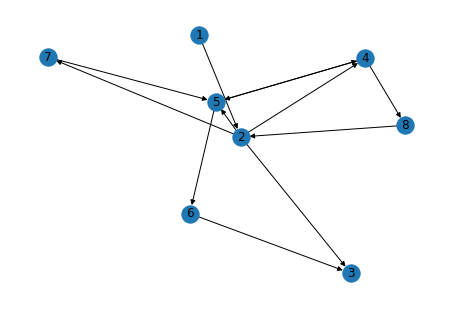

In [168]:
nx.draw(g, with_labels=True)

In [144]:
list(g.predecessors(2))

[1, 8]

In [14]:
gun = nx.to_undirected(g)
for c in nx.enumerate_all_cliques(gun):
    if (len(c) > 2):
        print(c)

[2, 4, 5]
[2, 4, 8]
[2, 5, 7]


In [15]:
done = []
res = []
for n in g:
    if n in done:
        continue
    for nei in g.neighbors(n):
        if n in g.neighbors(nei):
            done.append(n)
            done.append(nei)
            res.append([n,nei])
            break
print(res)

[[4, 5]]


In [20]:
def getTwoWayNodes(G):
    done = []
    res = []
    for n in G:
        if n in done:
            continue
        for nei in G.neighbors(n):
            if n in G.neighbors(nei):
                done.append(n)
                done.append(nei)
                res.append([n, nei])
                break
    return res

def shrinkCycles2(G):
    g2 = nx.DiGraph()
    g2.add_nodes_from(G.nodes)
    g2.add_edges_from(G.edges)
    tways = getTwoWayNodes(G)
    for x in tways:
        new_node = x[0]*10+x[1]
        g2.add_node(new_node)
        for n in g2:
            if n in x:
                for nei in g2.neighbors(n):
                    g2.add_edge(new_node, nei, weight=1)
                continue
            if not(new_node in g2.neighbors(n)):
                if ((x[0] in g2.neighbors(n)) or (x[1] in g2.neighbors(n))):
                    g2.add_edge(n, new_node, weight=1)
        g2.remove_node(x[0])
        g2.remove_node(x[1])
    return g2

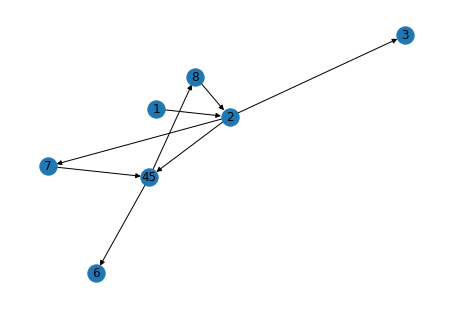

In [21]:
no2g = shrinkCycles2(g)
nx.draw(no2g, with_labels=True)

In [174]:
def getCycles(G):
    final_cyc = {}
    visited = []
    tmp_cyc = {}
    for n in G:
        print(visited)
        if n not in visited:
            tmp_cyc = dfs(1, G, [], {}, visited)
    for key in tmp_cyc:
        res = []
        no_flag = False
        for i in tmp_cyc[key]:
            for j in res:
                if i == j:
                    no_flag = True
            if not no_flag:
                res.append(i)
        final_cyc[key] = res
    return final_cyc
        

def dfs(n, G, path, cycles, visited):
    visited.append(n)
    path.append(n)
    for nei in G.neighbors(n):
        if nei in path:
            if nei == path[-1]:
                continue
            i = path.index(nei)
            c_size = len(path) - i
            if not (c_size in cycles):
                cycles[c_size] = []
            cycles[c_size].append(set(path[i:]))
            continue
        else:
            dfs(nei, G, path, cycles, visited)
    path.pop()
    return cycles

x = getCycles(g)
print(x)

[]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
[1, 2, 3, 4, 5, 6, 3, 8, 5, 6, 3, 4, 8, 7, 5, 6, 3, 4, 8]
{2: [{4, 5}], 3: [{8, 2, 4}], 4: [{8, 2, 4, 5}], 5: [{2, 4, 5, 7, 8}]}


In [31]:
gg = no2g
res = []
def find1Cycle(G, start, second):
    res = []
    if start in nx.descendants(G, second):
        cycle.append(second)
                
def findCycles(G):
    res = []
    for n in G:
        nres = [n]
        for nei in G.neighbors(n):
            
            
print(res)

[[1], [2, 7, 45], [3], [6], [7, 45], [8, 2], [45, 8]]


In [147]:
all = []
for n in g:
    forn = []
    for nei in g.neighbors(n):
        for reachable in nx.descendants(g, nei):
            if reachable in g.neighbors(n):
                forn.append(nei)
                break
    all.append(forn)
print(all)
                

[[], [4, 5, 7], [], [], [4], [], []]


In [107]:
def dfs(g, n, path, long_path):
    tmp_path = path + [n]
    print(n, ' -->', long_path)
    for nei in g.neighbors(n):
        long_path  = dfs(g, nei, tmp_path, long_path)
        if len(tmp_path) > len(long_path):
            long_path = tmp_path
        #tmp_path.remove(tmp_path[len(tmp_path)-1])
    print(n, ' -->', long_path)
    return long_path

In [108]:
x = dfs(g, 1, [], [])
x

1  --> []
2  --> []
3  --> []
3  --> []
4  --> [1, 2]
5  --> [1, 2]
6  --> [1, 2]
6  --> [1, 2]
5  --> [1, 2, 4, 5]
4  --> [1, 2, 4, 5]
2  --> [1, 2, 4, 5]
1  --> [1, 2, 4, 5]


[1, 2, 4, 5]

[{2, 4, 5, 7, 8}]
{2, 4, 5, 7, 8}
[{8, 2, 4, 5}]
[{8, 2, 4}]
[{4, 5}]


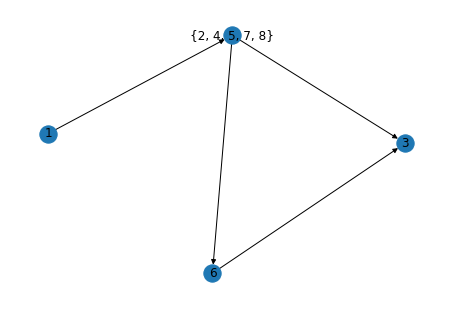

In [169]:
def isSubsetOfAny(sets, l):
    for s in sets:
        if l <= s:
            return True
    return False

def shrinkCycles(G):
    g2 = G.copy()
    cycles = getCycles(G)
    keys = sorted(cycles.keys(), reverse = True)
    done = []
    for k in keys:
        c_k = cycles[k]
        print(c_k)
        for c in c_k:
            if isSubsetOfAny(done, c):
                continue
            print(c)
            g2 = shrinkTheCycle(g2, c)
            done.append(c)
    return g2

def shrinkTheCycle(G, c):
    res_G = G.copy()
    merged_node = str(c)
    res_G.add_node(merged_node)
    for n in c:
        for ss in g.successors(n):
            if not ss in c:
                res_G.add_edge(merged_node, ss)
        for ps in g.predecessors(n):
            if not ps in c:
                res_G.add_edge(ps, merged_node)
        if n in G:
            res_G.remove_node(n)
    return res_G
        
x = {2, 4, 8, 7, 5}
gg = shrinkCycles(g)  
nx.draw(gg, with_labels=True)
    
    

In [216]:
x = '{2, 31, 48, -20}'
def nodeToNums(node):
    node = node[1:-1]
    node = node.replace(' ', '')
    nums = node.split(',')
    res = set()
    for n in nums:
        if n.isdecimal:
            res.add(int(n))
    return res

z = nodeToNums(x)
type(z) == set

True

In [ ]:
#THIS IS TEST SECTION - THIS IS TEST SECTION _ THIS IS TEST SECTION
g = nx.DiGraph()
g.add_edge('1', '2')
g.add_edge('1', '3')
g.add_edge('2', '4')
g.add_edge('3', '2')
g.add_edge('4', '5')
g.add_edge('5', '6')
g.add_edge('6', '7')
g.add_edge('6', '8')
g.add_edge('7', '6')
#g.add_edge('7', '10')
g.add_edge('8', '5')
g.add_edge('3', '9')
g.add_edge('9', '10')
g.add_edge('10', '11')
g.add_edge('9', '11')
g.add_edge('11', '9')
g.add_edge('11', '12')
g.add_edge('12', '13')
g.add_edge('9', '14')
g.add_edge('14', '15')
g.add_edge('15', '16')
g.add_edge('14', '13')
#nx.draw(g, with_labels=True)
#myg = transformToDAG(g)
#getBridges(myg)
#getLongestPath(myg)
#getParallelPaths(myg)
#THIS IS TEST SECTION - THIS IS TEST SECTION _ THIS IS TEST SECTION
#g = nx.fast_gnp_random_graph(100, 0.02, directed=True)
g = nx.gnr_graph(30, 0.05)
dag = transformToDAG(g)
nx.draw(dag, with_labels=True)